In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import warnings
import seaborn as sns

# Evitar warnings para melhor experiência de Apresentação
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
dataset = pd.read_csv("dataset/Fraud.csv")

In [4]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
dataset.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
dataset.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


In [7]:
dataset.tail(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.00,C830041824,0.00,54652.46,1,0
6362606,742,TRANSFER,303846.74,C959102961,303846.74,0.00,C114421319,0.00,0.00,1,0
6362607,742,CASH_OUT,303846.74,C1148860488,303846.74,0.00,C846260566,343660.89,647507.63,1,0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.00,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0


In [8]:
dataset.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2594071,207,CASH_IN,223182.41,C81485898,4424116.57,4647298.97,C704169085,1094643.65,871461.24,0,0
1553019,154,CASH_OUT,464140.33,C1820975527,20777.00,0.00,C1332141614,264.34,464404.66,0,0
4420873,322,PAYMENT,32200.27,C605465256,6320.00,0.00,M1115960986,0.00,0.00,0,0
4149456,303,PAYMENT,25373.74,C80546343,0.00,0.00,M1464732899,0.00,0.00,0,0
5997975,426,CASH_OUT,468086.42,C953480183,8742.00,0.00,C978140621,1845510.49,2313596.91,0,0
1769393,162,PAYMENT,1682.81,C851257404,0.00,0.00,M1143075896,0.00,0.00,0,0
1686091,159,PAYMENT,18501.61,C925887951,0.00,0.00,M737885572,0.00,0.00,0,0
630443,34,CASH_OUT,410173.65,C2145141743,0.00,0.00,C304406966,3572104.99,3977082.77,0,0
686707,36,CASH_OUT,203558.86,C1136497636,153.00,0.00,C1911645398,16957.95,220516.81,0,0
4374014,311,CASH_OUT,225402.59,C88593849,0.00,0.00,C1314758477,318889.95,544292.54,0,0


In [9]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [10]:
# Criar a coluna "prefixNameOrig" no dataset original
dataset['prefixNameOrig'] = dataset['nameOrig'].apply(lambda x: x[0])

# Criar a coluna "prefixNameDest" no dataset original
dataset['prefixNameDest'] = dataset['nameDest'].apply(lambda x: x[0])

In [11]:
# Definir as faixas de valores e os rótulos
faixas = [
    (0, 100000, 'Faixa 1'),
    (100000, 500000, 'Faixa 2'),
    (500000 , 1000000, 'Faixa 3'),
    (1000000, 10000000, 'Faixa 4'),
    (10000000, float('inf'), 'Faixa 5')
]

# Função para atribuir a categoria com base no valor
def assign_category(amount):
    for i, faixa in enumerate(faixas):
        if faixa[0] <= amount < faixa[1]:
            return faixa[2]
    return None

# Criar a coluna "amount_category" com as faixas de valores no dataset numérico
dataset['amount_category'] = dataset['amount'].apply(assign_category)



In [12]:
dataset.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,prefixNameOrig,prefixNameDest,amount_category
5739687,399,CASH_IN,78731.74,C1707171677,30360.00,109091.74,C1676201514,0.00,0.00,0,0,C,C,Faixa 1
5493566,380,CASH_OUT,48124.37,C1411827055,574.00,0.00,C1321026773,0.00,48124.37,0,0,C,C,Faixa 1
3998338,298,PAYMENT,27891.28,C1348149893,0.00,0.00,M1319633554,0.00,0.00,0,0,C,M,Faixa 1
5150490,357,PAYMENT,2469.38,C153812724,231431.00,228961.62,M773614040,0.00,0.00,0,0,C,M,Faixa 1
80241,10,CASH_OUT,351048.36,C1843210722,0.00,0.00,C1495001462,4574845.36,4925893.72,0,0,C,C,Faixa 2
6321532,688,CASH_OUT,112470.42,C161186832,11888.00,0.00,C233873799,397610.67,510081.09,0,0,C,C,Faixa 2
957993,44,CASH_OUT,227705.26,C474863785,0.00,0.00,C1708306077,667002.31,894707.57,0,0,C,C,Faixa 2
4594572,328,CASH_IN,430152.13,C1318425728,59269.00,489421.13,C1250480335,0.00,0.00,0,0,C,C,Faixa 2
4531045,326,CASH_IN,35156.26,C304337917,941536.19,976692.46,C1506564506,618631.85,583475.59,0,0,C,C,Faixa 1
3983978,298,CASH_OUT,186874.35,C1596061258,0.00,0.00,C978140621,755670.72,942545.07,0,0,C,C,Faixa 2


In [13]:
dataset_texto = dataset[['type', 'nameOrig' , 'nameDest', 'prefixNameOrig' , 'prefixNameDest', 'amount_category']]

In [14]:
dataset_numeros = dataset[
        ['step', 'amount' , 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
    ]

In [15]:
dataset_texto.describe()

,type,nameOrig,nameDest,prefixNameOrig,prefixNameDest,amount_category
count,6362620,6362620,6362620,6362620,6362620,6362620
unique,5,6353307,2722362,1,2,5
top,CASH_OUT,C1902386530,C1286084959,C,C,Faixa 1
freq,2237500,3,113,6362620,4211125,3525256


In [16]:
dataset['prefixNameDest'].value_counts()

C    4211125
M    2151495
Name: prefixNameDest, dtype: int64

In [17]:
# Mapear os valores de 'prefixNameDest' para 0 e 1
prefix_map = {'C': 0, 'M': 1}
dataset_numeros['PrefixNameDestIndex'] = dataset['prefixNameDest'].map(prefix_map)

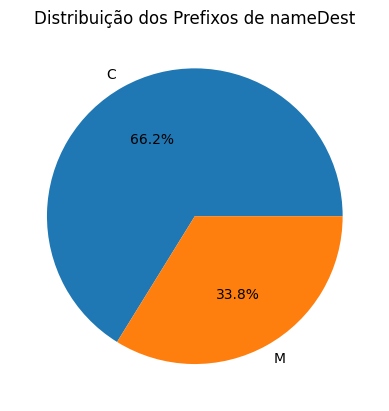

In [18]:
counts = dataset['prefixNameDest'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribuição dos Prefixos de nameDest')
plt.show()

In [19]:
dataset[dataset['isFraud'] == 1]['prefixNameDest'].value_counts()

C    8213
Name: prefixNameDest, dtype: int64

In [20]:
dataset_numeros.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,PrefixNameDestIndex
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00,0.34
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00,0.47
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00,1.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00,1.00


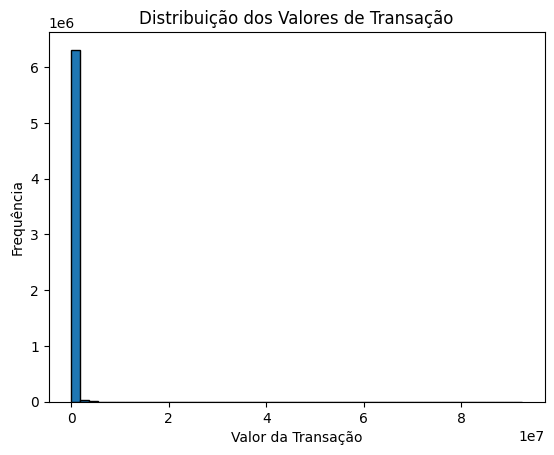

In [21]:
# Plotar histograma dos valores de transação
plt.hist(dataset['amount'], bins=50, edgecolor='black')
plt.xlabel('Valor da Transação')
plt.ylabel('Frequência')
plt.title('Distribuição dos Valores de Transação')
plt.show()

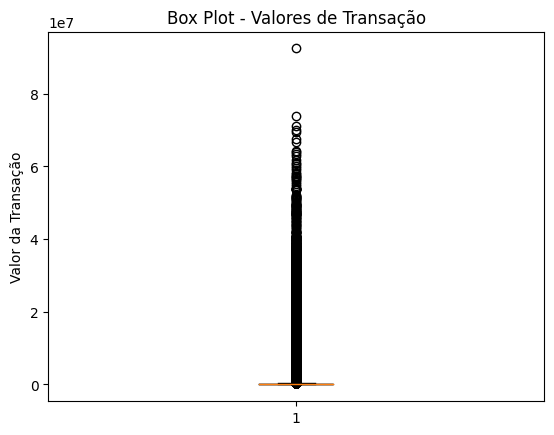

In [22]:
plt.boxplot(dataset['amount'])
plt.ylabel('Valor da Transação')
plt.title('Box Plot - Valores de Transação')
plt.show()

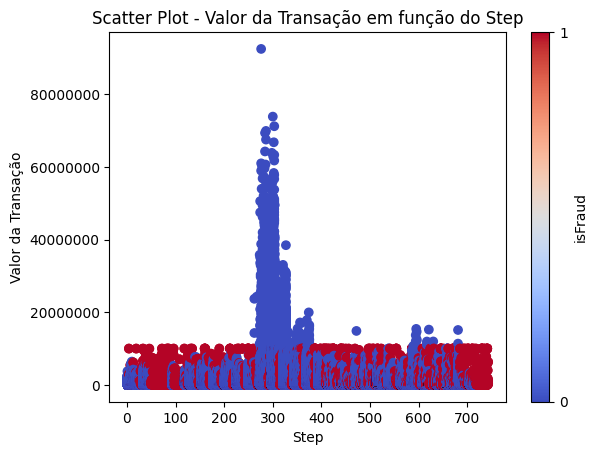

In [23]:

plt.scatter(dataset['step'], dataset['amount'], c=dataset['isFraud'], cmap='coolwarm')
plt.xlabel('Step')
plt.ylabel('Valor da Transação')
plt.title('Scatter Plot - Valor da Transação em função do Step')

plt.colorbar(label='isFraud', ticks=[0, 1])

# Ajustar o formato dos rótulos do eixo y
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in plt.gca().get_yticks()])

# Ajustar o formato dos rótulos do eixo x
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in plt.gca().get_xticks()])

plt.show()

In [24]:
dataset_texto['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

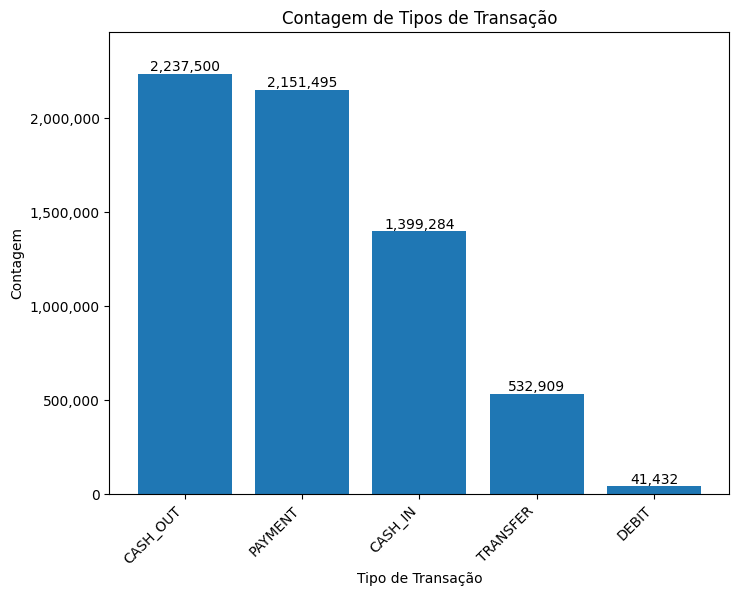

In [25]:
# Contagem das categorias 'type'
type_counts = dataset_texto['type'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(8, 6))  # Definir tamanho da figura
bars = plt.bar(type_counts.index, type_counts.values)  # Plotar barras
plt.xlabel('Tipo de Transação')  # Definir rótulo do eixo x
plt.ylabel('Contagem')  # Definir rótulo do eixo y
plt.title('Contagem de Tipos de Transação')  # Definir título do gráfico

# Personalizar eixo x para evitar rotação dos rótulos
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos nas barras com separador de milhar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom')

# Ajustar escala do eixo y
plt.ylim(0, type_counts.max() * 1.1)

# Adicionar separador de milhar no eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exibir o gráfico
plt.show()

In [26]:
# Filtrar o dataset original para obter o dataset sem as fraudes
dataset_no_fraude = dataset[dataset['isFraud'] == 0]

# Filtrar o dataset original para obter o dataset com as fraudes
dataset_fraude = dataset[dataset['isFraud'] == 1]

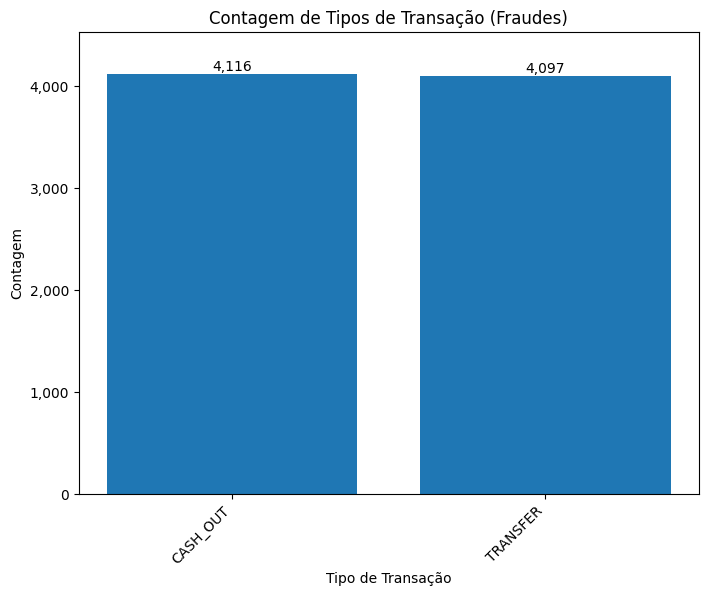

In [27]:
# Contagem das categorias 'type' no dataset filtrado
type_counts_frauds = dataset_fraude['type'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(8, 6))  # Definir tamanho da figura
bars = plt.bar(type_counts_frauds.index, type_counts_frauds.values)  # Plotar barras
plt.xlabel('Tipo de Transação')  # Definir rótulo do eixo x
plt.ylabel('Contagem')  # Definir rótulo do eixo y
plt.title('Contagem de Tipos de Transação (Fraudes)')  # Definir título do gráfico

# Personalizar eixo x para evitar rotação dos rótulos
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos nas barras com separador de milhar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom')

# Ajustar escala do eixo y
plt.ylim(0, type_counts_frauds.max() * 1.1)

# Adicionar separador de milhar no eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exibir o gráfico
plt.show()

In [28]:
dataset_numeros['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<Figure size 600x600 with 0 Axes>

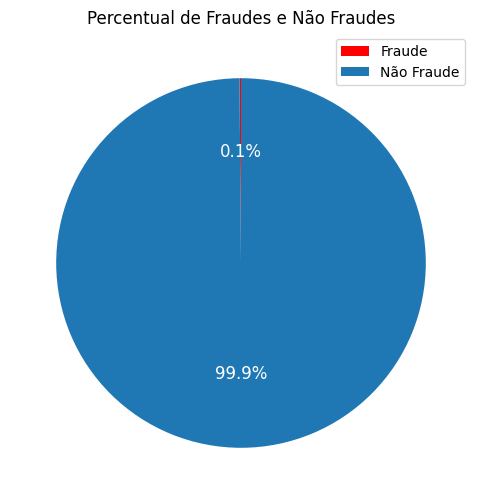

In [29]:
# Contagem das ocorrências de fraudes e não fraudes
fraud_count = dataset['isFraud'].value_counts()

# Criar uma lista com as contagens
count_list = [fraud_count[1], fraud_count[0]]
# Definir os rótulos para o gráfico
labels = ['Fraude', 'Não Fraude']

# Definir as cores das fatias
colors = ['#FF0000', '#1f77b4']  # Vermelho para fraude, azul para não fraude

# Plotar o gráfico de pizza
plt.figure(figsize=(6, 6))  # Definir tamanho da figura
plt.figure(figsize=(6, 6))  # Definir tamanho da figura
patches, _, text = plt.pie(count_list, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
                           textprops={'color': 'white', 'fontsize': 12})
# Adicionar título ao gráfico
plt.title('Percentual de Fraudes e Não Fraudes')
plt.legend()
plt.show()

In [30]:
# Mapear as categorias do tipo "type" para valores numéricos
type_mapping = {
    'CASH_OUT': 0,
    'PAYMENT': 1,
    'CASH_IN': 2,
    'TRANSFER': 3,
    'DEBIT': 4
}

# Criar a coluna "type_num" no dataset numérico
dataset_numeros['type_num'] = dataset['type'].map(type_mapping)

# Exibir o dataset com a nova coluna
dataset_numeros.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,PrefixNameDestIndex,type_num
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,1,1
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,1,1
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,3
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,1,1


In [31]:
dataset_numeros['type_num'].value_counts()

0    2237500
1    2151495
2    1399284
3     532909
4      41432
Name: type_num, dtype: int64

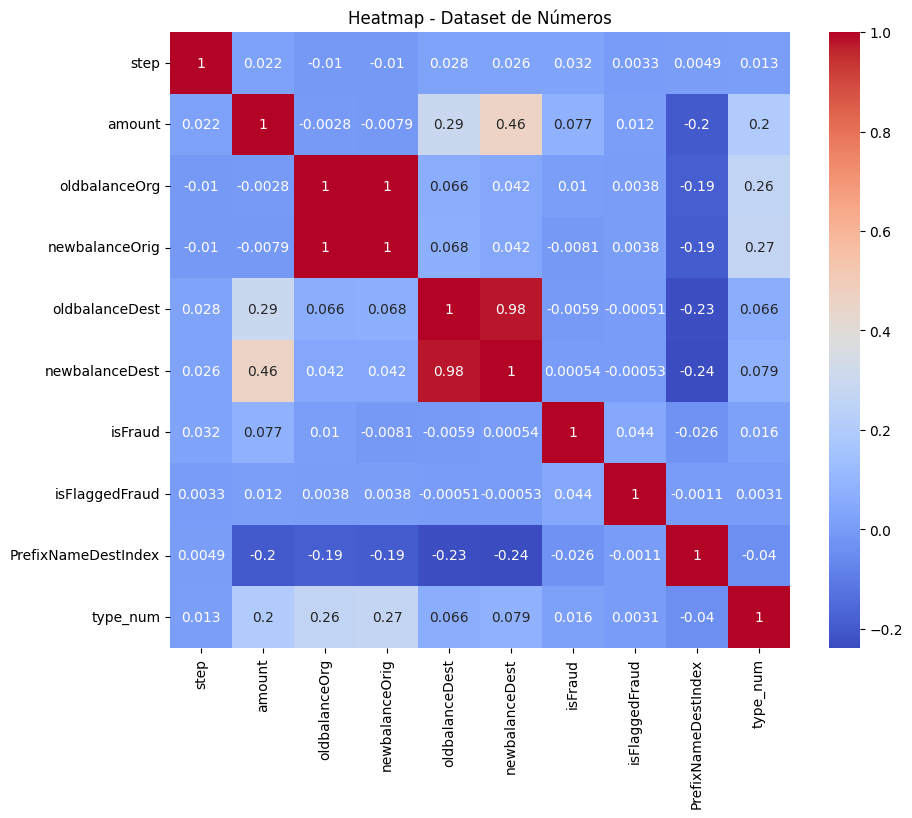

In [32]:
# Calcular a matriz de correlação
correlation_matrix = dataset_numeros.corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap - Dataset de Números")
plt.show()

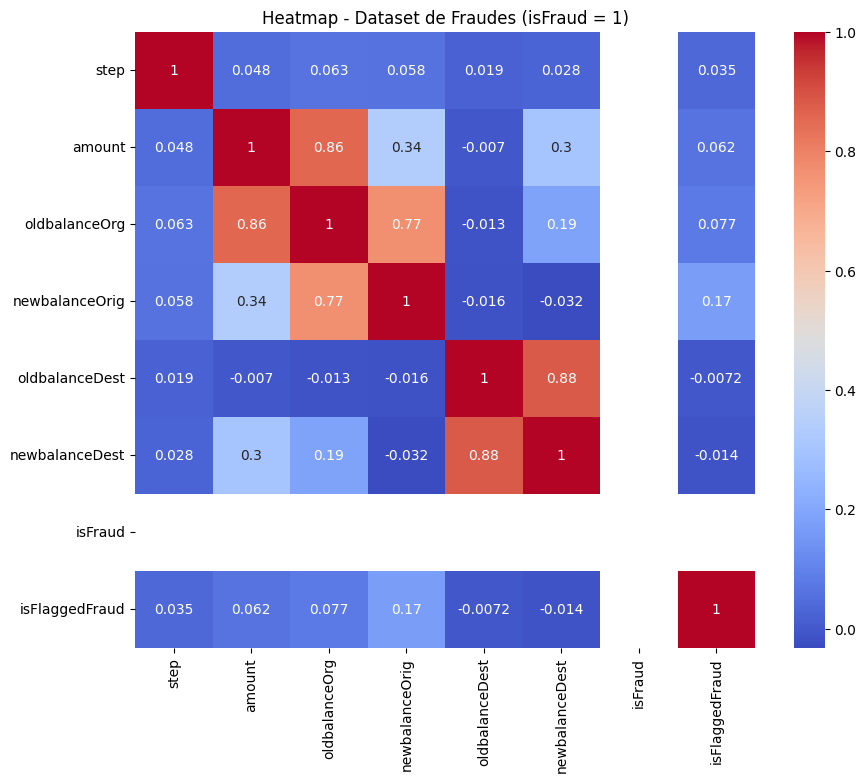

In [33]:
# Calcular a matriz de correlação para as transações de fraude
correlation_matrix = dataset_fraude.corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap - Dataset de Fraudes (isFraud = 1)")
plt.show()

In [34]:
dataset_numeros['amount'].describe()

count    6362620.00
mean      179861.90
std       603858.23
min            0.00
25%        13389.57
50%        74871.94
75%       208721.48
max     92445516.64
Name: amount, dtype: float64

In [35]:
dataset_fraude['amount'].describe()

count       8213.00
mean     1467967.30
std      2404252.95
min            0.00
25%       127091.33
50%       441423.44
75%      1517771.48
max     10000000.00
Name: amount, dtype: float64

In [36]:
dataset_no_fraude['amount'].describe()

count    6354407.00
mean      178197.04
std       596236.98
min            0.01
25%        13368.40
50%        74684.72
75%       208364.76
max     92445516.64
Name: amount, dtype: float64

In [37]:
dataset_fraude['amount'].mean()

1467967.299140387

In [38]:
dataset_no_fraude['amount'].mean()

178197.04172740763

In [39]:
dataset_fraude['amount'].std()

2404252.9472401612

In [40]:
dataset_no_fraude['amount'].std()

596236.9813471739

In [41]:
dataset['amount_category'].value_counts()

Faixa 1    3525256
Faixa 2    2497080
Faixa 3     209658
Faixa 4     124976
Faixa 5       5650
Name: amount_category, dtype: int64

In [42]:
dataset.groupby('amount_category')['amount'].sum()

amount_category
Faixa 1    95508516355.60
Faixa 2   575328919322.12
Faixa 3   139791983281.64
Faixa 4   253556603423.81
Faixa 5    80206922376.60
Name: amount, dtype: float64

In [43]:
# Agrupar o dataset de fraudes pela coluna 'amount_category' e calcular a soma e contagem das transações
dataset_fraude.groupby('amount_category')['amount'].sum()



amount_category
Faixa 1     73020052.09
Faixa 2    681369887.63
Faixa 3    841303179.17
Faixa 4   7590722308.95
Faixa 5   2870000000.00
Name: amount, dtype: float64

In [44]:
dataset_fraude.groupby('amount_category')['amount'].count()


amount_category
Faixa 1    1707
Faixa 2    2642
Faixa 3    1158
Faixa 4    2419
Faixa 5     287
Name: amount, dtype: int64

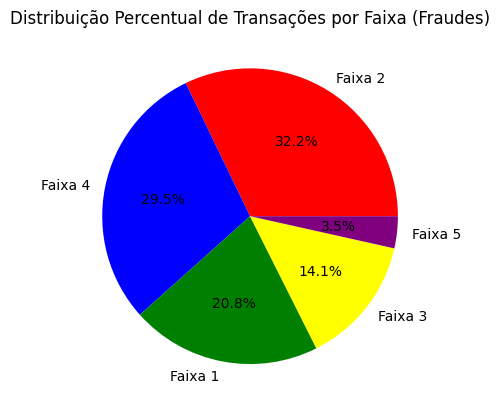

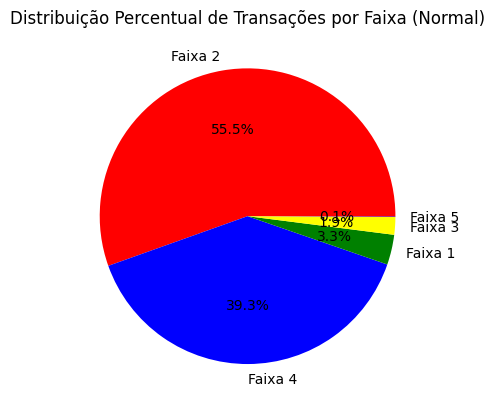

In [45]:
# Obter a contagem de transações por faixa de transações para o dataset de fraudes
contagem_por_faixa_fraude = dataset_fraude['amount_category'].value_counts()

# Obter a contagem de transações por faixa de transações para o dataset normal sem as fraudes
contagem_por_faixa_normal = dataset_no_fraude['amount_category'].value_counts()

# Configurar os rótulos das faixas de transações
labels = contagem_por_faixa_fraude.index

# Configurar os valores para o dataset de fraudes e para o dataset normal sem as fraudes
fraude_values = contagem_por_faixa_fraude.values
normal_values = contagem_por_faixa_normal.values

# Criar a figura e os eixos do primeiro gráfico de pizza para o dataset de fraudes
fig1, ax1 = plt.subplots()
ax1.pie(fraude_values, labels=labels, autopct='%1.1f%%', colors=['red', 'blue', 'green', 'yellow', 'purple'])
ax1.set_title('Distribuição Percentual de Transações por Faixa (Fraudes)')

# Criar a figura e os eixos do segundo gráfico de pizza para o dataset normal sem as fraudes
fig2, ax2 = plt.subplots()
ax2.pie(normal_values, labels=labels, autopct='%1.1f%%', colors=['red', 'blue', 'green', 'yellow', 'purple'])
ax2.set_title('Distribuição Percentual de Transações por Faixa (Normal)')

# Exibir os gráficos de pizza
plt.show()


In [46]:
# Calcular a média do amount para as transações de fraude (isFraud = 1)
dataset[dataset['isFraud'] == 1].groupby('type')['amount'].mean()

type
CASH_OUT   1455102.59
TRANSFER   1480891.67
Name: amount, dtype: float64

In [47]:
# Calcular a média do amount para as transações não fraudulentas (isFraud = 0)
dataset[dataset['isFraud'] == 0].groupby('type')['amount'].mean()

type
CASH_IN    168920.24
CASH_OUT   173917.16
DEBIT        5483.67
PAYMENT     13057.60
TRANSFER   906229.01
Name: amount, dtype: float64

In [48]:
dataset_fraude.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8213.00,8213.00,8213.00,8213.00,8213.00,8213.00,8213.00,8213.00
mean,368.41,1467967.30,1649667.61,192392.63,544249.62,1279707.62,1.00,0.00
std,216.39,2404252.95,3547719.44,1965666.46,3336420.95,3908816.53,0.00,0.04
min,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,181.00,127091.33,125822.44,0.00,0.00,0.00,1.00,0.00
50%,367.00,441423.44,438983.45,0.00,0.00,4676.42,1.00,0.00
75%,558.00,1517771.48,1517771.48,0.00,147828.66,1058725.22,1.00,0.00
max,743.00,10000000.00,59585040.37,49585040.37,236230516.82,236726494.66,1.00,1.00


In [49]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


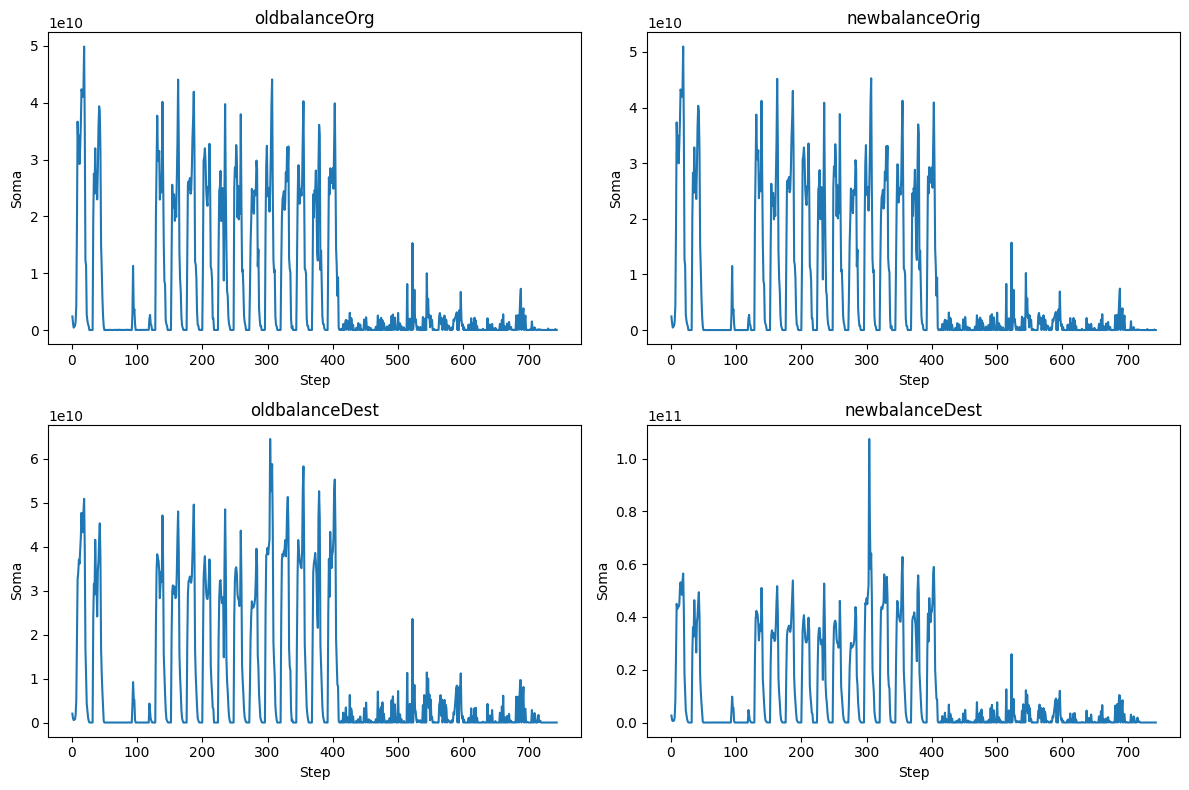

In [50]:

# Agrupar os dados por "step" e calcular a soma e a média das séries
grouped_sum = dataset.groupby('step')['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'].sum()

# Configurar o layout dos subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plotar gráfico para a série "oldbalanceOrg"
axs[0, 0].plot(grouped_sum.index, grouped_sum['oldbalanceOrg'])
axs[0, 0].set_xlabel('Step')
axs[0, 0].set_ylabel('Soma')
axs[0, 0].set_title('oldbalanceOrg')

# Plotar gráfico para a série "newbalanceOrig"
axs[0, 1].plot(grouped_sum.index, grouped_sum['newbalanceOrig'])
axs[0, 1].set_xlabel('Step')
axs[0, 1].set_ylabel('Soma')
axs[0, 1].set_title('newbalanceOrig')

# Plotar gráfico para a série "oldbalanceDest"
axs[1, 0].plot(grouped_sum.index, grouped_sum['oldbalanceDest'])
axs[1, 0].set_xlabel('Step')
axs[1, 0].set_ylabel('Soma')
axs[1, 0].set_title('oldbalanceDest')

# Plotar gráfico para a série "newbalanceDest"
axs[1, 1].plot(grouped_sum.index, grouped_sum['newbalanceDest'])
axs[1, 1].set_xlabel('Step')
axs[1, 1].set_ylabel('Soma')
axs[1, 1].set_title('newbalanceDest')

# Ajustar os espaçamentos entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()


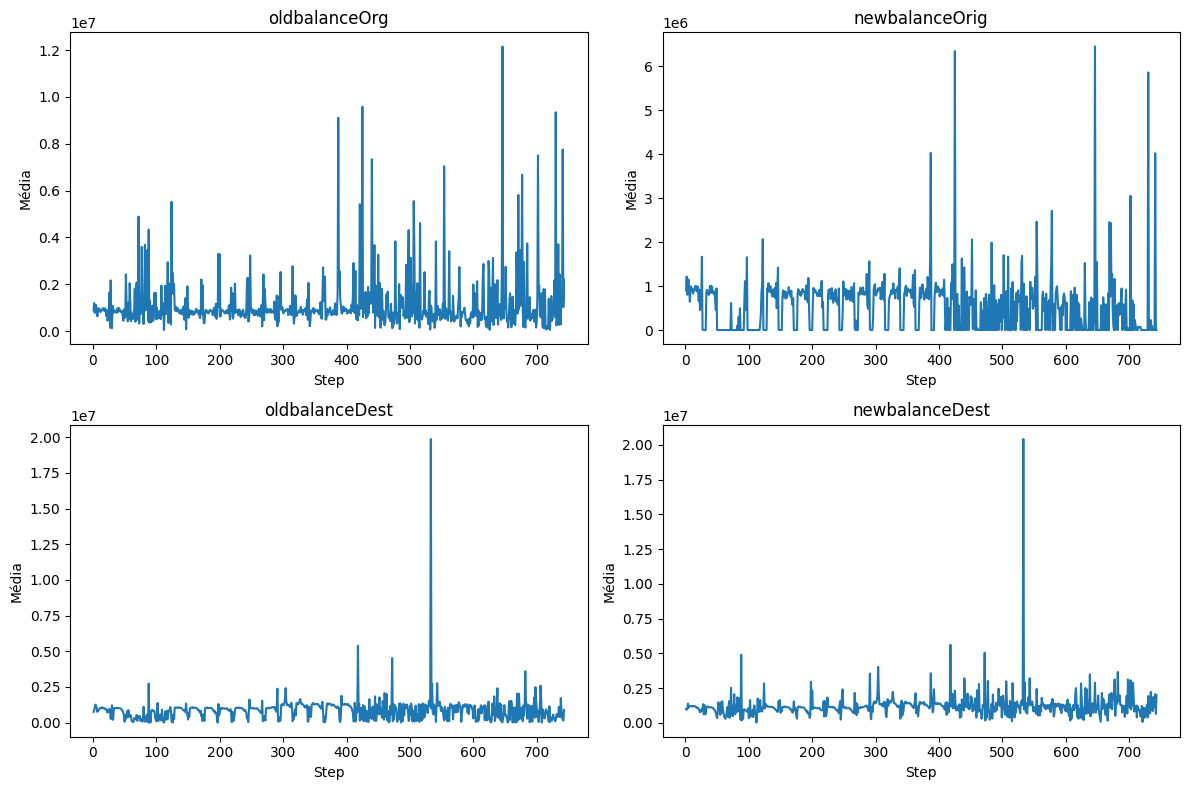

In [51]:
# Agrupar os dados por "step" e calcular a média das séries
grouped_mean = dataset.groupby('step')['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'].mean()

# Configurar o layout dos subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plotar gráfico para a média da série "oldbalanceOrg"
axs[0, 0].plot(grouped_mean.index, grouped_mean['oldbalanceOrg'])
axs[0, 0].set_xlabel('Step')
axs[0, 0].set_ylabel('Média')
axs[0, 0].set_title('oldbalanceOrg')

# Plotar gráfico para a média da série "newbalanceOrig"
axs[0, 1].plot(grouped_mean.index, grouped_mean['newbalanceOrig'])
axs[0, 1].set_xlabel('Step')
axs[0, 1].set_ylabel('Média')
axs[0, 1].set_title('newbalanceOrig')

# Plotar gráfico para a média da série "oldbalanceDest"
axs[1, 0].plot(grouped_mean.index, grouped_mean['oldbalanceDest'])
axs[1, 0].set_xlabel('Step')
axs[1, 0].set_ylabel('Média')
axs[1, 0].set_title('oldbalanceDest')

# Plotar gráfico para a média da série "newbalanceDest"
axs[1, 1].plot(grouped_mean.index, grouped_mean['newbalanceDest'])
axs[1, 1].set_xlabel('Step')
axs[1, 1].set_ylabel('Média')
axs[1, 1].set_title('newbalanceDest')

# Ajustar os espaçamentos entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [52]:
dataset_fraude['step'].value_counts()

212    40
523    30
387    28
425    28
249    28
       ..
202     2
589     2
112     2
548     2
662     2
Name: step, Length: 741, dtype: int64

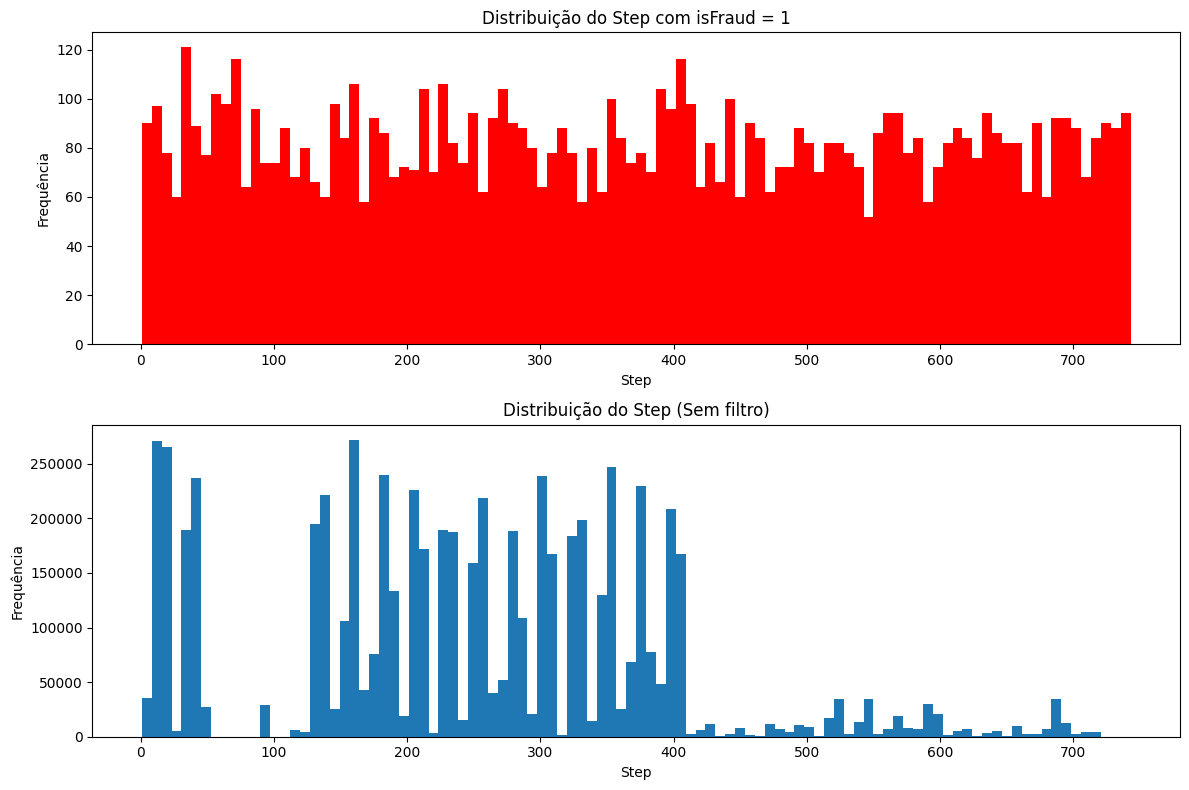

In [53]:
# Filtrar o dataset pelo isFraud = 1

# Configurar a figura e os eixos
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plotar o histograma do step com isFraud = 1
axs[0].hist(dataset_fraude['step'], bins=100, color='red')
axs[0].set_xlabel('Step')
axs[0].set_ylabel('Frequência')
axs[0].set_title('Distribuição do Step com isFraud = 1')

# Plotar o histograma do step sem filtro
axs[1].hist(dataset['step'], bins=100)
axs[1].set_xlabel('Step')
axs[1].set_ylabel('Frequência')
axs[1].set_title('Distribuição do Step (Sem filtro)')

# Ajustar os espaçamentos entre os subplots
plt.tight_layout()

# Exibir os histogramas
plt.show()

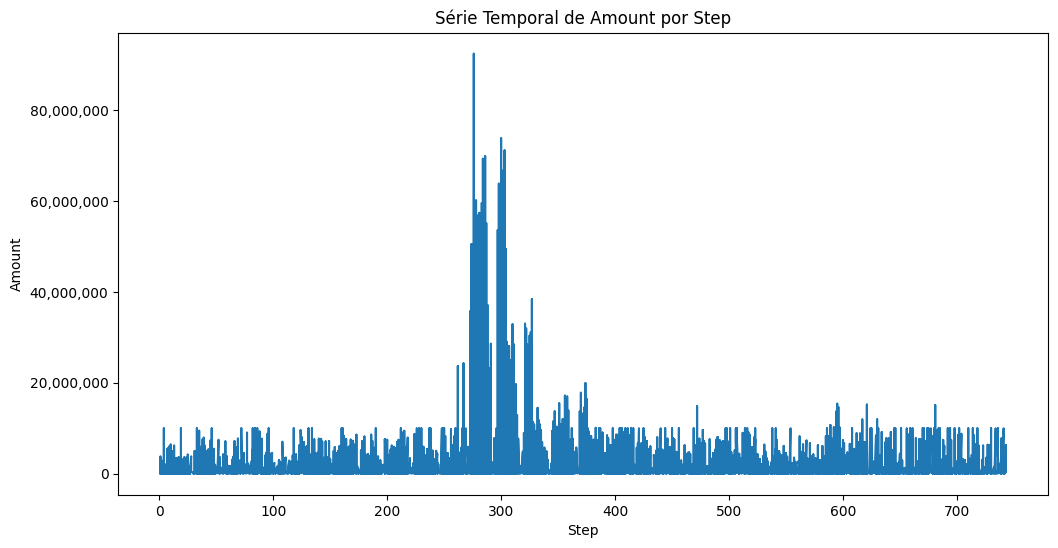

In [54]:
# Criar figura
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar série temporal
ax.plot(dataset['step'], dataset['amount'])

# Configurar os eixos
ax.set_xlabel('Step')
ax.set_ylabel('Amount')
ax.set_title('Série Temporal de Amount por Step') 

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Exibir o gráfico
plt.show()

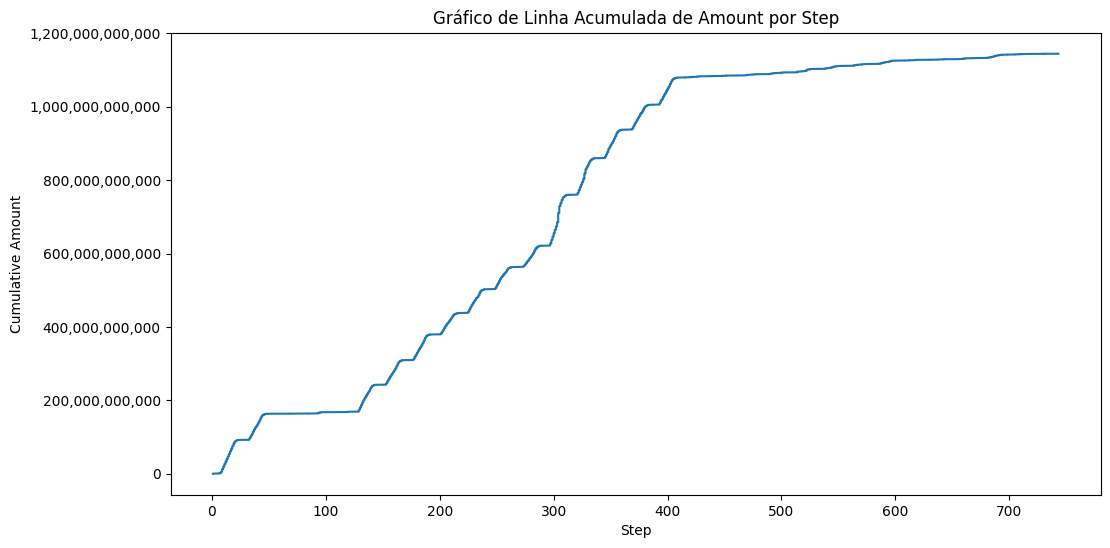

In [55]:
# Criar figura
fig, ax = plt.subplots(figsize=(12, 6))

# Calcular a soma acumulada da coluna "amount"
cumulative_amount = dataset['amount'].cumsum()

# Plotar a linha acumulada
ax.plot(dataset['step'], cumulative_amount)

# Configurar os eixos
ax.set_xlabel('Step')
ax.set_ylabel('Cumulative Amount')
ax.set_title('Gráfico de Linha Acumulada de Amount por Step')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Exibir o gráfico
plt.show()

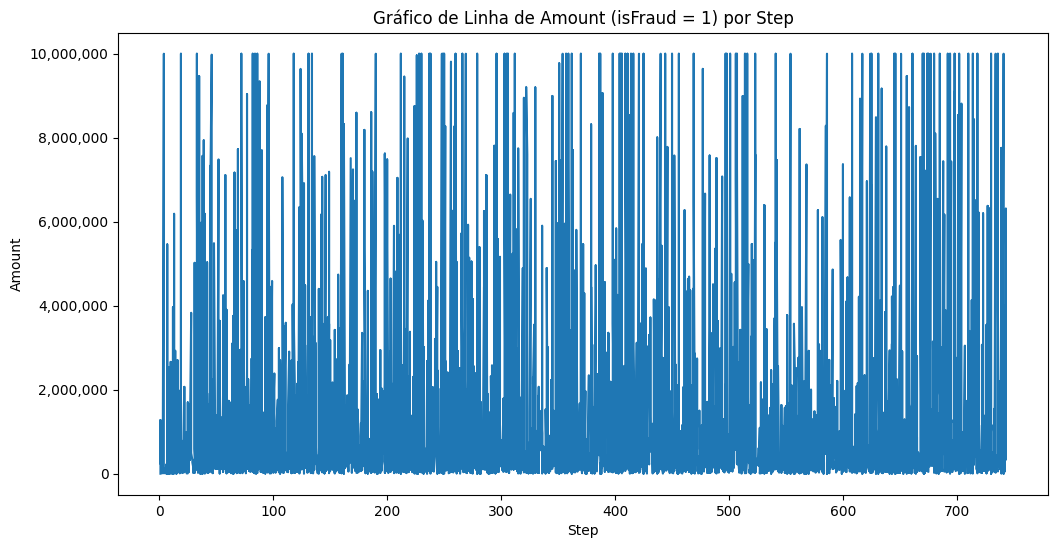

In [56]:
# Criar figura
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar a linha não cumulativa para o dataset de fraudes
ax.plot(dataset_fraude['step'], dataset_fraude['amount'])

# Configurar os eixos
ax.set_xlabel('Step')
ax.set_ylabel('Amount')
ax.set_title('Gráfico de Linha de Amount (isFraud = 1) por Step')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Exibir o gráfico
plt.show()

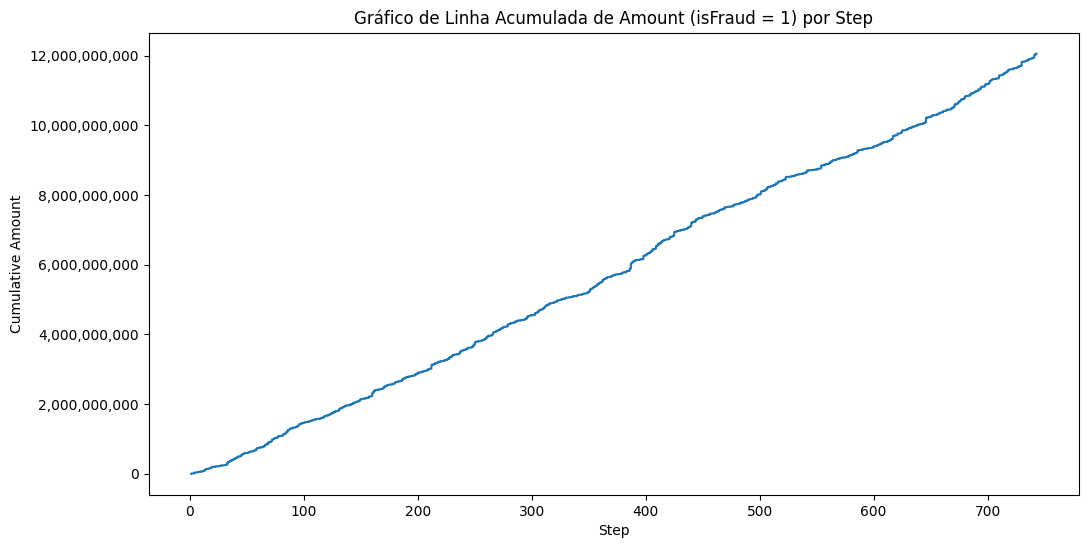

In [57]:
# Criar figura
fig, ax = plt.subplots(figsize=(12, 6))

# Calcular a soma acumulada da coluna "amount" para o dataset de fraudes
cumulative_amount_fraud = dataset_fraude['amount'].cumsum()

# Plotar a linha acumulada para o dataset de fraudes
ax.plot(dataset_fraude['step'], cumulative_amount_fraud)

# Configurar os eixos
ax.set_xlabel('Step')
ax.set_ylabel('Cumulative Amount')
ax.set_title('Gráfico de Linha Acumulada de Amount (isFraud = 1) por Step')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Exibir o gráfico
plt.show()